# This is only a sample

In [8]:
import numpy as np
import csv
import cartopy.io.shapereader as shpreader

# 读取世界国家shape文件
shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = list(reader.records())

# 创建随机值
random_values = np.random.rand(len(countries))

# 将国家名称和随机数值写入CSV文件
output_filepath = "G:\\Hangkai\\Forest_edge\\country_stats\\test\\country_random_values.csv"
with open(output_filepath, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Country", "Random_Value"])
    for country, value in zip(countries, random_values):
        writer.writerow([country.attributes['SOVEREIGNT'], value])

print(f"Data written to {output_filepath}")

Data written to G:\Hangkai\Forest_edge\country_stats\test\country_random_values.csv


In [9]:
# 读取CSV文件并转换为列表
file_path = "G:\\Hangkai\\Forest_edge\\country_stats\\test\\country_random_values.csv"

with open(file_path, 'r', encoding='ISO-8859-1') as f:
    lines = f.readlines()[1:]  # 跳过标题行
    
    # 使用字典来整合重复的国家数据
    data_dict = {}
    for line in lines:
        values = line.strip().split(',')
        country = values[0]
        
        # 如果国家不在字典中，将其添加到字典中
        if country not in data_dict:
            data_dict[country] = [float(i) for i in values[1:]]
        else:
            # 如果国家已经在字典中，累加数据
            for i in range(len(data_dict[country])):
                data_dict[country][i] += float(values[i + 1])

# 创建一个新的矩阵
# new_matrix = [['country', 'stable', 'increase increase', 'increase decrease', 'decrease increase', 'decrease decrease', 'forest edge 2000', 'forest edge 2020']]
new_matrix = [['country', 'data']]
for country, data in data_dict.items():
    new_matrix.append([country] + data)

# 将新的矩阵保存为CSV
output_file_path = "G:\\Hangkai\\Forest_edge\\country_stats\\test\\aggregated_country_data.csv"
with open(output_file_path, 'w', encoding='ISO-8859-1') as f:
    for row in new_matrix:
        f.write(','.join(map(str, row)) + '\n')

print(f"Aggregated data saved to {output_file_path}")


Aggregated data saved to G:\Hangkai\Forest_edge\country_stats\test\aggregated_country_data.csv


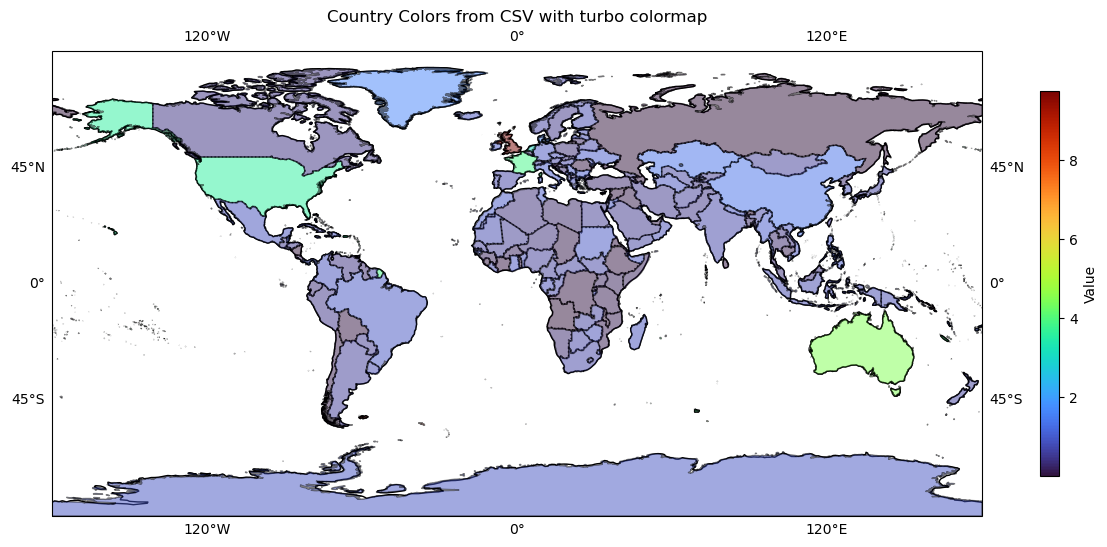

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Step 1: Read CSV
country_values = {}
with open("G:\\Hangkai\\Forest_edge\\country_stats\\test\\aggregated_country_data.csv", 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # skip header
    for row in reader:
        country_values[row[0]] = float(row[1])

        
# Step 2: Color each country by cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                  linewidth=0, color='black', alpha=1, 
                  xlocs=[-120, 0, 120],  # Adjust for desired longitude spacing
                  ylocs=[-90, -45, 0, 45, 90])
shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

cmap = plt.cm.turbo
norm = plt.Normalize(min(country_values.values()), max(country_values.values()))

for country in reader.records():
    sovereign_name = country.attributes['SOVEREIGNT']
    if sovereign_name in country_values:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=cmap(norm(country_values[sovereign_name])),
                          edgecolor='k', alpha=0.5)

# Step 3: add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Value')

plt.title('Country Colors from CSV with turbo colormap')
plt.show()


# Figure for stable edge

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# Step 1: Read CSV
country_values = {}
with open("G:\\Hangkai\\Forest_edge\\country_stats\\test\\country_random_values.csv", 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # skip header
    for row in reader:
        country_values[row[0]] = float(row[2])

        
# Step 2: Color each country by cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                  linewidth=0, color='black', alpha=1, 
                  xlocs=[-120, 0, 120],  # Adjust for desired longitude spacing
                  ylocs=[-90, -45, 0, 45, 90])
shpfilename = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

cmap = plt.cm.turbo
norm = plt.Normalize(min(country_values.values()), max(country_values.values()))

for country in reader.records():
    sovereign_name = country.attributes['NAME']
    if sovereign_name in country_values:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=cmap(norm(country_values[sovereign_name])),
                          edgecolor='k', alpha=0.5)

# Step 3: add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Value')

plt.title('Country Colors from CSV with turbo colormap')
plt.show()